In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df= pd.read_csv('SPY.csv',index_col ='Date', parse_dates=True)

In [125]:
df['LogReturn'] =np.log(df['Close']).diff()

In [126]:
df['LogReturn'] = df['LogReturn'].shift(-1)

In [127]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,0.002644
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.000704
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.004212
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.003322
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.001396


In [128]:
df['SlowSMA'] = df['Close'].rolling(30).mean()
df['FastSMA'] = df['Close'].rolling(10).mean()

<AxesSubplot:xlabel='Date'>

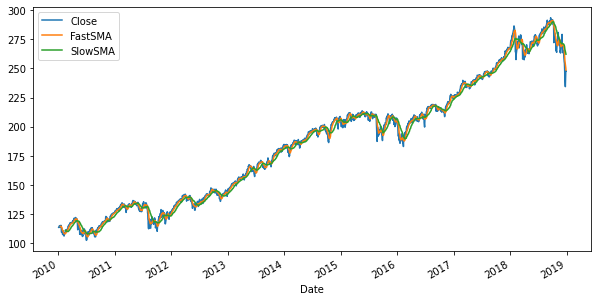

In [129]:
df[['Close','FastSMA','SlowSMA']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

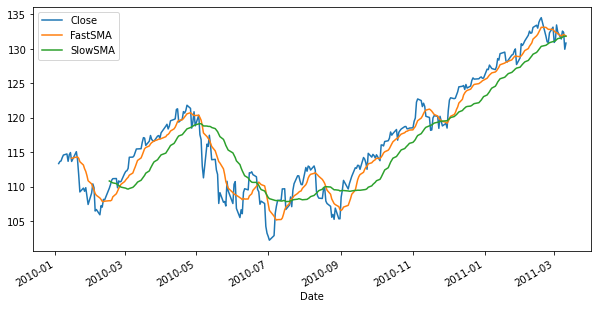

In [130]:
df[['Close','FastSMA','SlowSMA']].iloc[:300].plot(figsize=(10,5))

In [131]:
df['Signal'] = np.where(df['FastSMA'] >= df['SlowSMA'],1,0)

In [132]:
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal
Date,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0


In [133]:
df['PrevSignal'] = df['Signal'].shift(1)
df['Buy']= (df['PrevSignal'] == 0) & (df['Signal'] == 1) # Fast< Slow --> Fast > Slow
df['Sell']= (df['PrevSignal'] == 1) & (df['Signal'] == 0) # Fast> Slow --> Fast > Slow

In [134]:
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell
Date,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0,1.0,False,True
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0,0.0,False,False
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0,0.0,False,False
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0,0.0,False,False


In [135]:
is_invested = False
def assign_is_invested(row):
    global is_invested
    if is_invested and row['Sell']:
        is_invested = False
    if not is_invested and row['Buy']:
        is_invested = True
    return is_invested
df['IsInvested'] = df.apply(assign_is_invested,axis=1)

In [136]:
df['AlgoLogReturn'] = df['IsInvested'] * df['LogReturn']

In [137]:
df['AlgoLogReturn'].sum()

0.3049019540291429

In [138]:
df['LogReturn'].sum()

0.782116240308401

In [139]:
df['AlgoLogReturn'].std(), df['AlgoLogReturn'].mean()/ df['AlgoLogReturn'].std()

(0.00608988006417083, 0.022133947090060876)

In [140]:
df['LogReturn'].std(), df['LogReturn'].mean()/ df['LogReturn'].std()

(0.009446971193167572, 0.036600423640896725)

In [141]:
#Trend-following performs worst.

# Searching for  fast and slow hyperparamaters

In [142]:
Ntest= 1000
def trend_following(df,fast,slow):
    try:
        global is_invested
        if slow != None or fast != None:
            df['SlowSMA'] = df['Close'].rolling(slow).mean()
            df['FastSMA'] = df['Close'].rolling(fast).mean()
            df['Signal'] = np.where(df['FastSMA'] >= df['SlowSMA'],1,0)
            df['PrevSignal'] = df['Signal'].shift(1)
            df['Buy']= (df['PrevSignal'] == 0) & (df['Signal'] == 1) # Fast< Slow --> Fast > Slow
            df['Sell']= (df['PrevSignal'] == 1) & (df['Signal'] == 0) # Fast> Slow --> Fast > Slow
            train = df.iloc[:-Ntest]
            test = df.iloc[-Ntest:]
            is_invested = False
            df.loc[:-Ntest,'IsInvested'] = train.apply(assign_is_invested, axis =1)
            df.loc[:-Ntest,'AlgoLogReturn'] = train['IsInvested'] * train['LogReturn']
            is_invested =False
            df.loc[-Ntest:,'IsInvested'] = test.apply(assign_is_invested, axis =1)
            df.loc[-Ntest:,'AlgoLogReturn'] = test['IsInvested'] * test['LogReturn']
            #last is no any effect
            return train['AlgoLogReturn'][:-1].sum(), test['AlgoLogReturn'][:-1].sum()   
    except Exception as e:
        print("-------------------------")
        print(fast)
        print(slow)
        print(e)
        print("-------------------------")

In [143]:
trend_following(df,8,20)

/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:15: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-Ntest,'IsInvested'] = train.apply(assign_is_invested, axis =1)
/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:16: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-Ntest,'AlgoLogReturn'] = train['IsInvested'] * train['LogReturn']
/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:18: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[-Ntest:,'IsInvested'] = test.apply(assign_is_invested, axis =1)
/var/folders/6z/z

(0.21371231572709082, 0.09118963830205207)

In [144]:
best_fast = None
best_slow = None
best_score = float('-inf')
for fast in range(3,30):
    f =fast + 5
    for slow in range(f, 50):
        score, _ = trend_following(df,fast,slow)
        if score > best_score:
            best_fast = fast
            best_fast = slow
            best_score = score
best_fast, best_slow, trend_following(df,best_fast,best_slow) 

/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:15: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-Ntest,'IsInvested'] = train.apply(assign_is_invested, axis =1)
/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:16: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-Ntest,'AlgoLogReturn'] = train['IsInvested'] * train['LogReturn']
/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:18: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[-Ntest:,'IsInvested'] = test.apply(assign_is_invested, axis =1)
/var/folders/6z/z

-------------------------
35
None
window must be an integer 0 or greater
-------------------------


/var/folders/6z/zfrlwktn1ls42xz760mlmp880000gn/T/ipykernel_17682/584300676.py:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[-Ntest:,'AlgoLogReturn'] = test['IsInvested'] * test['LogReturn']


(35, None, None)

In [145]:
train=df.iloc[:-Ntest].copy()
test=df.iloc[-Ntest:].copy()


In [146]:
#total return buy-and-hold train
train['LogReturn'][:-1].sum()

0.5970866514889401

In [147]:
#total return buy-and-hold test
#last value is none
test['LogReturn'][:-1].sum()

0.19307543946998518

In [148]:
#Sr aglo vs Str buy-and-hold train
train['AlgoLogReturn'].mean()/ train['AlgoLogReturn'].std(), train['LogReturn'].mean()/ train['LogReturn'].std(),

(0.022665731993713023, 0.046428678368196585)

In [149]:
#Sr aglo vs Str buy-and-hold train
test['AlgoLogReturn'].mean()/ test['AlgoLogReturn'].std(), test['LogReturn'].mean()/ test['LogReturn'].std(),


(0.024630916793698096, 0.022384106381325413)

In [155]:
#weealt over time
train['CumLogReturn'] = train['AlgoLogReturn'].cumsum().shift(1)
train['CumWealth'] = train.iloc[0]['Close']* np.exp(train['CumLogReturn'][1:])

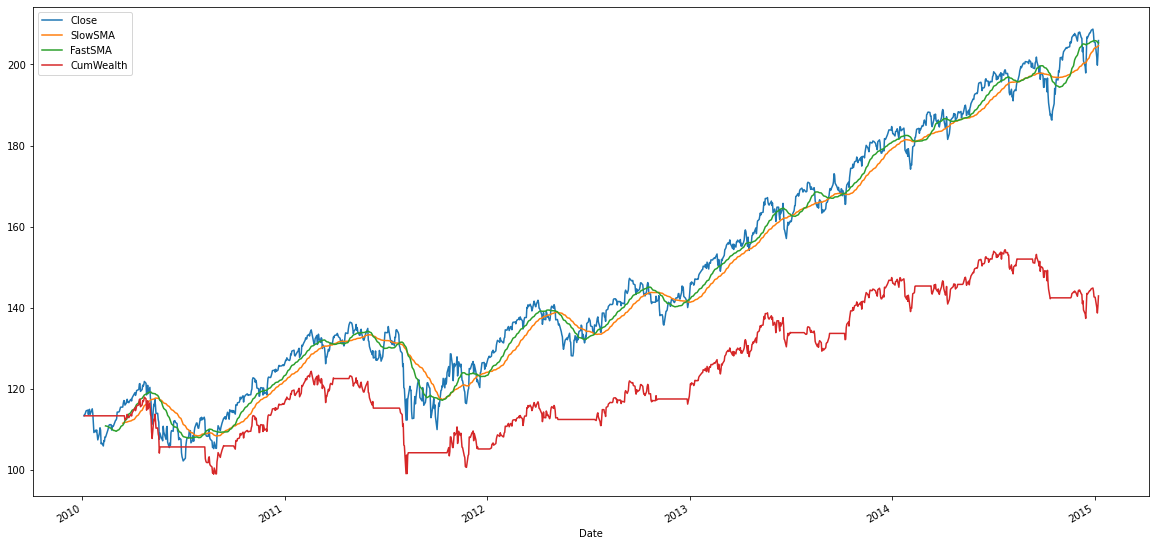

In [158]:
train[['Close','SlowSMA','FastSMA','CumWealth']].plot(figsize=(20,10));